# Importing all libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

# Reading the data

In [5]:
pd.read_csv('burritos_01022018.csv')

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pollos Maria,combo chicken,1/28/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nico's Taco Shop,California,1/30/2016,Carmel Valley,3860 Valley Centre Dr #404,http://www.yelp.com/biz/nicos-taco-shop-san-diego,3.0,2.9,NaN,7.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nico's Taco Shop,Carnitas,1/30/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Los Primos Mexican Food,Monster California,2/1/2016,UTC,7770 Regents Rd,http://www.primosmex.com/,3.0,3.7,x,9.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,JV's Mexican Food,Carne Asada,2/6/2016,Morena,1112 Morena Blvd,http://jvsmexfood.com/,4.0,4.1,NaN,6.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Storing the data in a variable

In [6]:
burritos=pd.read_csv('burritos_01022018.csv')

# To obtain the column names

In [7]:
burritos.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'overall',
       'Rec', 'Reviewer', 'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico',
       'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp',
       'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito',
       'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

# Cleaning the data and removing unwanted columns and replacing all the null values with mean of it

In [8]:
burritos.drop([ 'Beef', 'Pico','Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp','Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots','Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito','Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso','Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini','Rec','Notes', 'Unreliable', 'NonSD','Chips'],axis=1,inplace=True)

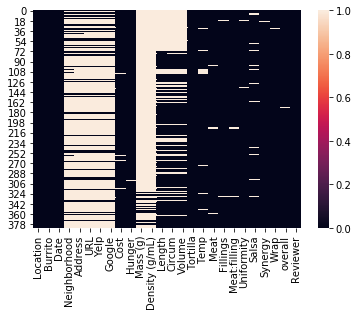

In [9]:
sns.heatmap(burritos.isnull())

In [10]:
#filling the empty spaces in the datasheet with the mean of the column 
burritos = burritos.fillna(burritos.mean())

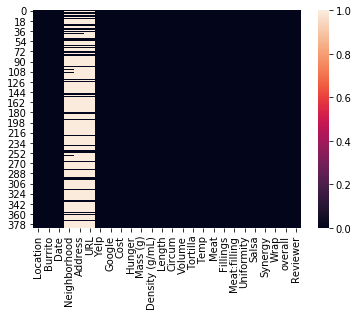

In [11]:
sns.heatmap(burritos.isnull())

In [12]:
#permanentely removing columns from the datasheet that are not used for analysis
burritos.drop(['Neighborhood','Address','URL'],axis=1,inplace=True)

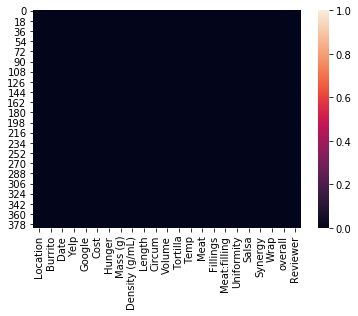

In [13]:
sns.heatmap(burritos.isnull())

# To Identify the best and worst burritos in San Diego 

Identify the best and worst burritos in San Diego .the best taco shop in each burrito dimension. The heterogeneity in names here underscores how no single taco shop serves the best burrito in all dimensions, to know which burrito is good we shall see the overall ratings nd corresponding to that we can deside which burruto is liked by different people

This is similar like if we need to purchase someting we also see the ratings first thyen we deside to buy the item

Here let first empty the location list then by sorting the overall rating lets add the loction based on the ratings in desending order then by that we can find which is best and worst burrito shop

In [14]:
x = burritos.groupby('Location').size().reset_index()
temp = x.sort_values(ascending=False, by=0)
temp
temp = temp[:15]
y = pd.DataFrame()
for name in temp['Location']:
    y = y.append(burritos[(burritos.Location==name)])
x = y.groupby('Location').mean().reset_index()
x = x.sort_values(by = ['overall','Location'],ascending=[False,False],)
x[[ 'overall','Location']]

,overall,Location
13,4.366667,Valentines Mexican Food
10,4.225000,Taco Stand
6,4.208333,Los Tacos
0,4.178679,California Burritos
12,4.116667,Taco stand
2,4.100000,Cancun Mexican & Seafood
1,4.100000,California burritos
9,3.927083,Rigoberto's Taco Shop
4,3.660000,Lolita's taco shop
3,3.548148,El Zarape


for conformation lets see this in graph

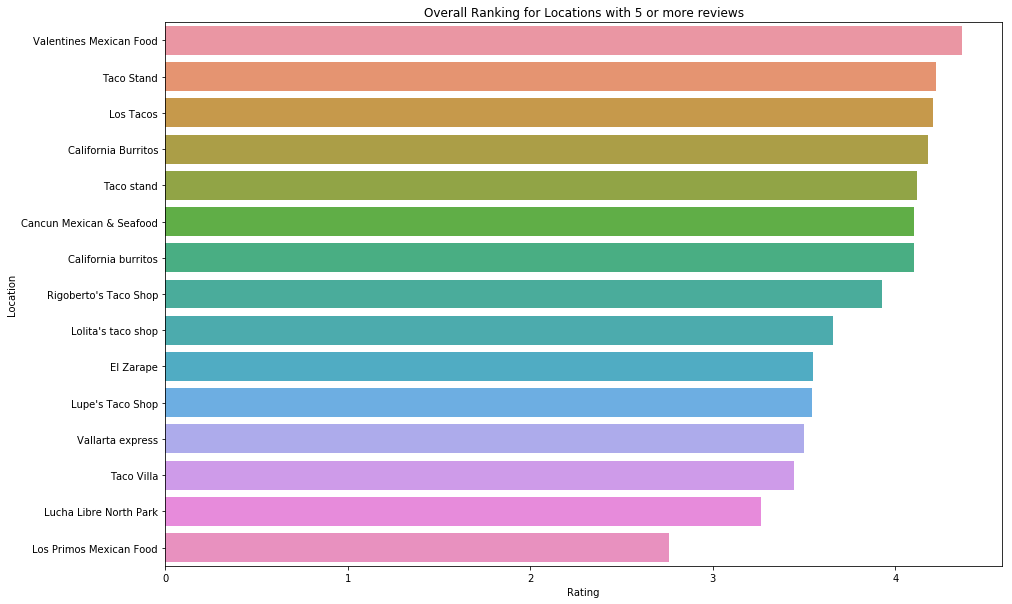

In [15]:
plt.figure(figsize=(15,10))
graph = sns.barplot( x = x['overall'],y = x['Location'])
graph.set_xlabel('Rating')
graph.set_ylabel('Location')
graph = graph.set_title('Overall Ranking for Locations with 5 or more reviews')

In [16]:
print('The best burrito is at Valentine’s Mexican Food which has earned the title of highest average burrito with ratings of almost 4.5 out of 5')

The best burrito is at Valentine’s Mexican Food which has earned the title of highest average burrito with ratings of almost 4.5 out of 5


In [17]:
print('The worst burrito is at Los Panchos Taco Shop which has lowest average burrito with ratings of almost 2.8 out of 5')

The worst burrito is at Los Panchos Taco Shop which has lowest average burrito with ratings of almost 2.8 out of 5


# Characterize the variance in burrito qualities across the county.

we need to even know how the other dimension also effect the burrito quality, i.e due to more data collected, we improve our confidence in not only with taco shops have the best burritos but even with highest rated  along each burrito dimensions  

# to know which taco shop is best for volume of burrito

In [ ]:
volume_ = x.sort_values(by = ['Volume','Location'],ascending=[False,False],)
volume_[[ 'Volume','Location']].head()

In [19]:
print('The best burrito is at "Lupe\'s Taco Shop" which has highest rating on the volume of the burrito')

The best burrito is at "Lupe's Taco Shop" which has highest rating on the volume of the burrito


# to know which taco shop is best for burrito tortilla

In [20]:

Tortilla_ = x.sort_values(by = ['Tortilla','Location'],ascending=[False,False],)
Tortilla_[[ 'Tortilla','Location']].head()

,Tortilla,Location
13,4.055556,Valentines Mexican Food
2,4.050000,Cancun Mexican & Seafood
0,3.991304,California Burritos
10,3.916667,Taco Stand
9,3.791667,Rigoberto's Taco Shop


In [21]:
print('The best burrito is at "Valentines Mexican Food" which has highest rating on the tortilla of the burrito')

The best burrito is at "Valentines Mexican Food" which has highest rating on the tortilla of the burrito


# to know which taco shop is best for keeping temparature for the burritos 

In [22]:

Temperature_ = x.sort_values(by = ['Temp','Location'],ascending=[False,False],)
Temperature_[[ 'Temp','Location']].head()

,Temp,Location
2,4.500000,Cancun Mexican & Seafood
13,4.411111,Valentines Mexican Food
3,4.304566,El Zarape
6,4.250000,Los Tacos
14,4.220244,Vallarta express


In [23]:
print('The best burrito is at "Cancun Mexican & seafood" which has highest rating on the temparature of the burrito')

The best burrito is at "Cancun Mexican & seafood" which has highest rating on the temparature of the burrito


# to know which taco shop  is best for meat flavour burrito

In [24]:

Meat_ = x.sort_values(by = ['Meat','Location'],ascending=[False,False],)
Meat_[[ 'Meat','Location']].head()

,Meat,Location
12,4.333333,Taco stand
10,4.291667,Taco Stand
6,4.258333,Los Tacos
1,4.250000,California burritos
13,4.133333,Valentines Mexican Food


In [25]:
print('The best burrito is at "Taco stand" which has highest rating on the meat flavour of the burrito')

The best burrito is at "Taco stand" which has highest rating on the meat flavour of the burrito


# to know which tacoshop is best for non meat flavour burrito

In [26]:

non_meat_ = x.sort_values(by = ['Fillings','Location'],ascending=[False,False],)
non_meat_[[ 'Fillings','Location']].head()

,Fillings,Location
13,4.166667,Valentines Mexican Food
12,4.041667,Taco stand
10,4.000000,Taco Stand
1,3.971258,California burritos
0,3.956522,California Burritos


In [27]:
print('The best burrito is at "Valentines Mexican Food" which has highest rating on the non meat flavour of the burrito')

The best burrito is at "Valentines Mexican Food" which has highest rating on the non meat flavour of the burrito


# to know which tacoshop is best for uniformity of burrito

In [28]:

Uniformity_ = x.sort_values(by = ['Uniformity','Location'],ascending=[False,False],)
Uniformity_[[ 'Uniformity','Location']].head()

,Uniformity,Location
1,4.166667,California burritos
13,4.111111,Valentines Mexican Food
12,3.916667,Taco stand
10,3.833333,Taco Stand
0,3.782609,California Burritos


In [29]:
print('The best burrito is at "California burritos" which has highest rating on the Uniformity of the burrito')

The best burrito is at "California burritos" which has highest rating on the Uniformity of the burrito


# to know which taco shop is best for salsa burrito

In [30]:

Salsa_ = x.sort_values(by = ['Salsa','Location'],ascending=[False,False],)
Salsa_[[ 'Salsa','Location']].head()

,Salsa,Location
12,4.000000,Taco stand
7,3.905303,Lucha Libre North Park
6,3.875000,Los Tacos
13,3.722222,Valentines Mexican Food
10,3.600000,Taco Stand


In [31]:
print('The best burrito is at "Taco stand" which has highest rating on the Salsa of the burrito')

The best burrito is at "Taco stand" which has highest rating on the Salsa of the burrito


# to know which tacoshop is best for wrap of burrito

In [32]:

Wrap_ = x.sort_values(by = ['Wrap','Location'],ascending=[False,False],)
Wrap_[[ 'Wrap','Location']].head()

,Wrap,Location
3,4.722222,El Zarape
11,4.442105,Taco Villa
1,4.383333,California burritos
0,4.347826,California Burritos
12,4.208333,Taco stand


In [33]:
print('The best burrito is at "El Zarape" which has highest rating on the Wrap of the burrito')

The best burrito is at "El Zarape" which has highest rating on the Wrap of the burrito


# to know which taco shop is best for synergy

In [34]:

Synergy_ = x.sort_values(by = ['Synergy','Location'],ascending=[False,False],)
Synergy_[[ 'Synergy','Location']].head()

,Synergy,Location
10,4.316667,Taco Stand
6,4.225000,Los Tacos
12,4.208333,Taco stand
1,4.100000,California burritos
0,4.086957,California Burritos


In [35]:
print('The best burrito is at "Taco stand" which has highest rating on the Synergy of the burrito')

The best burrito is at "Taco stand" which has highest rating on the Synergy of the burrito


# to know which taco shop is best for meat filling ratio in burrito

In [36]:

filling_ = x.sort_values(by = ['Meat:filling','Location'],ascending=[False,False],)
filling_[[ 'Meat:filling','Location']].head()

,Meat:filling,Location
13,4.500000,Valentines Mexican Food
9,4.106850,Rigoberto's Taco Shop
12,4.041667,Taco stand
0,4.032609,California Burritos
3,3.972222,El Zarape


In [37]:
print('The best burrito is at "Valentines Mexican Food" which has highest rating on the meat:filling ratio of the burrito')

The best burrito is at "Valentines Mexican Food" which has highest rating on the meat:filling ratio of the burrito


# to noe the characterize variance in burrito qualities across the tacoshop

In [38]:
table={
    'Dimension':['Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings','Meat:filling', 'Uniformity', 'Salsa', 'Wrap','Synerg'],
    'Best_taco_shop':['Lupe\'s Taco Shop','Valentines Mexican Food','Cancun Mexican & Seafood','Taco stand','Valentines Mexican Food','Valentines Mexican Food','California burritos','Taco stand','El Zarape','Taco stand']
}

In [39]:
pd.DataFrame(table)

,Dimension,Best_taco_shop
0,Volume,Lupe's Taco Shop
1,Tortilla,Valentines Mexican Food
2,Temp,Cancun Mexican & Seafood
3,Meat,Taco stand
4,Fillings,Valentines Mexican Food
5,Meat:filling,Valentines Mexican Food
6,Uniformity,California burritos
7,Salsa,Taco stand
8,Wrap,El Zarape
9,Synerg,Taco stand


# Even the variance of burritos with respect to taco shop depend on the cost of the burrito so lets start analysining the location based on the cost of burrito

In [40]:
cost = x.sort_values(by = ['overall','Cost'],ascending=[False,True],)
cost[['Location', 'overall', 'Cost']]

,Location,overall,Cost
13,Valentines Mexican Food,4.366667,7.644444
10,Taco Stand,4.225000,7.515000
6,Los Tacos,4.208333,8.050000
0,California Burritos,4.178679,6.323913
12,Taco stand,4.116667,7.745833
1,California burritos,4.100000,6.291667
2,Cancun Mexican & Seafood,4.100000,6.733333
9,Rigoberto's Taco Shop,3.927083,6.770762
4,Lolita's taco shop,3.660000,7.750000
3,El Zarape,3.548148,6.694444


In [41]:
print('The best burrito will always be at high rating and a bit costly than others and our analysis also proved so from the above data i can say that "Valentines Mexican Food" is of high rating of 4.3 and highest cost of 7.6$')

The best burrito will always be at high rating and a bit costly than others and our analysis also proved so from the above data i can say that "Valentines Mexican Food" is of high rating of 4.3 and highest cost of 7.6$


# Plotting the distribution graph for the cost of best reviewed burrito

C:\Users\User\Desktop\python\New folder\anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of reviewed burrito cost. in $')

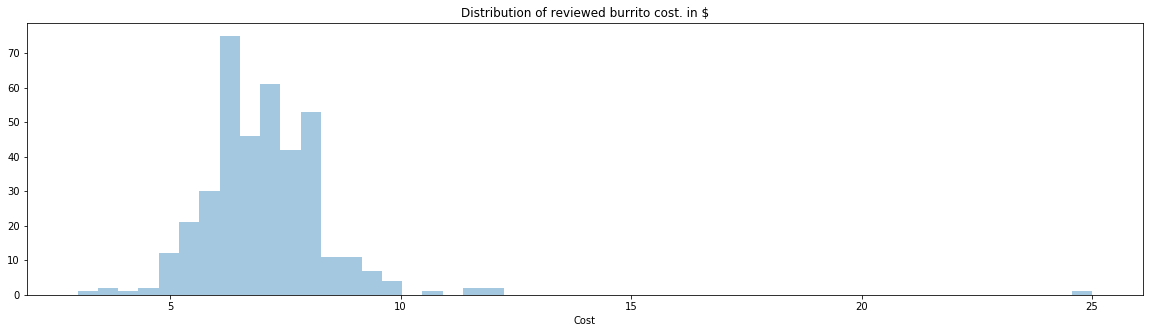

In [42]:
plt.figure(figsize=(20,5))
sns.distplot(burritos['Cost'],kde=False)
plt.title('Distribution of reviewed burrito cost. in $')

# Investigate correlations in its dimensions

Taking correlation between the dimensions i.e It is important to note that each metric is not independent of one another, and in fact there are considerable correlations between numerous dimensions. This is clearly seen in the correlation matrix below. While the overall rating correlates positively with almost all measures, these measures are not independent of one another

In [43]:
#to obtain the correlation plot oly between the dimension which affect the burrito quality
Dimension=burritos[['Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings','Meat:filling', 'Uniformity', 'Salsa', 'Wrap','Synergy']]

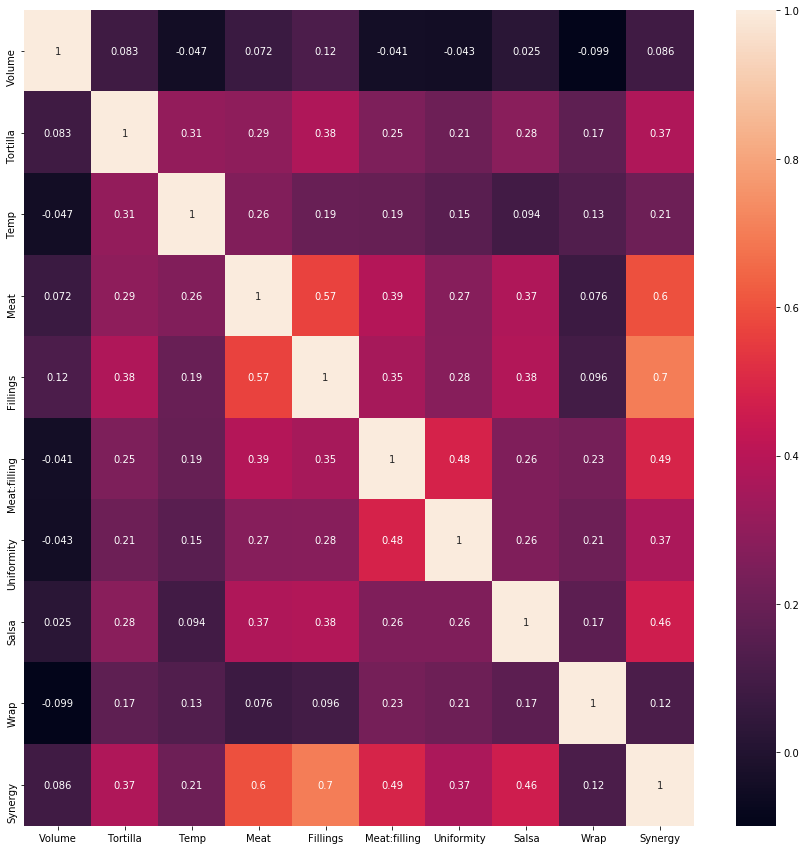

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(Dimension.corr(),annot=True)

# Finding the model which is better to calculate the overall rating based on the 10 dimensions

# Generate models for what makes a burrito great 

As we know the input and output for certain input datas we can predict the ouput of unknown data easily, so to find the value we use regression under supervised learning and in that lets take linear regression so that we can train the computer better which after calculating the error distance minimises and gives a stright line which relates to input nd output which even makes easier to calculate the output of unknown input 

In [45]:
from sklearn.linear_model import LinearRegression

Before going into the training part first lets scale the data using preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler

Splitting the datas into training and testing set 

In [47]:
X=burritos[['Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings','Meat:filling', 'Uniformity', 'Salsa', 'Wrap','Synergy']]
y=burritos['overall']

storing the models into a variable for easy access

In [48]:
sc=StandardScaler()
lr=LinearRegression()

In [49]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

training the computer

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

checking how accurate will be our selection of model

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
y_pred=lr.predict(X_test)

to know the accuracy of the training by linear model

In [54]:
r2_score(y_test,y_pred)

0.8184085911790766

to find the coeffecient for find the linear line we know from general maths for drawing a linear line in a graph we need a formula saying y=(m*x)+c, where m is the slop/co-effecient and c is the constant

In [55]:
lr.coef_

array([0.03393918, 0.02601697, 0.06362996, 0.17398977, 0.17422467,
       0.07181378, 0.05094854, 0.02986338, 0.05484584, 0.26984445])

In [56]:
lr.intercept_

3.658339805447471

To know of much does each dimension effect the quality of burrito

In [57]:
pd.DataFrame(lr.coef_,index=X.columns,columns=['coefficients'])

,coefficients
Volume,0.033939
Tortilla,0.026017
Temp,0.063630
Meat,0.173990
Fillings,0.174225
Meat:filling,0.071814
Uniformity,0.050949
Salsa,0.029863
Wrap,0.054846
Synergy,0.269844


# Conclusion

We can could conclude from this that all that’s important in a burrito is the quality of its ingredients, not the care with which it was prepared. An alternative is that these indications of poor technique are more common at a place that uses poor ingredients. Another interpretation is that poor preparation (e.g. too low of a temperature) can have a negative impact on the subjective ratings of ingredient quality. However Meat:Filling, was a significant predictor of overall burrito rating

Though the place,cost, hungryness adds effects on the type of best burrito, the quality of burrito is more than all soo all the ingredients that are necessary counts for the analysis of best burrito even the presentation hygiene also counts